In [5]:
import cv2

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    # Capture a single frame
    ret, frame = cap.read()

    # Check if the frame was captured successfully
    if ret:
        print("Frame captured successfully!")
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.flip(frame, 1)  # 1 = horizontal flip, 0 = vertical, -1 = both
        print(f"Frame shape (height, width, channels): {frame.shape}")
        print(f"Frame data type: {frame.dtype}")

        # You can optionally save the frame to a file
        # cv2.imwrite("captured_frame.jpg", frame)
        # print("Frame saved as 'captured_frame.jpg'")

        # You can also display the frame (optional)
        # cv2.imshow("Captured Frame", frame)
        # cv2.waitKey(0) # Wait indefinitely until a key is pressed
        # cv2.destroyAllWindows()
    else:
        print("Error: Could not capture frame.")

# Release the webcam
cap.release()

Frame captured successfully!
Frame shape (height, width, channels): (480, 640, 3)
Frame data type: uint8


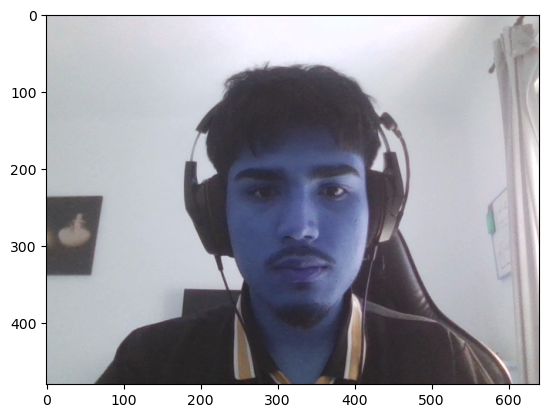

In [4]:
import matplotlib.pyplot as plt

plt.imshow(frame)

In [32]:
import torch
import pandas as pd
from PIL import Image


# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5n", device= 0)  # load on GPU
path = "C:/Users/iqbal/Pictures/Camera Roll/test1.jpg"
im = Image.open(path)

results = model(im)
results.pandas().xyxy[0]

Using cache found in C:\Users\iqbal/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-2 Python-3.12.7 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 
C:\Users\iqbal/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


,xmin,ymin,xmax,ymax,confidence,class,name
0,245.234329,489.664062,642.644714,718.684814,0.644269,15,cat
1,331.808319,135.914764,1039.966187,720.000000,0.601291,0,person
2,23.243271,260.537720,261.723022,425.408508,0.471533,62,tv


In [12]:
from webcam.capture import WebcamCapturer

stream = WebcamCapturer()
frame = stream.read()
plt.imshow(frame)
stream.release()


Webcam initialized: Width=640, Height=480, FPS=24.00003840006144


In [7]:
from model.load_model import model

print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

In [46]:
%%time
import numpy as np

df = results.pandas().xyxy[0]
df = df[df.confidence >= 0.2].drop(columns=["class","confidence"])

np.array(df)

CPU times: total: 0 ns
Wall time: 2 ms


array([[245.2343292236328, 489.6640625, 642.6447143554688, 718.684814453125, 'cat'],
       [331.8083190917969, 135.91476440429688, 1039.9661865234375, 720.0, 'person'],
       [23.243270874023438, 260.5377197265625, 261.7230224609375, 425.40850830078125, 'tv']], dtype=object)